<a href="https://colab.research.google.com/github/nitya-daida/heartdiseaseprediction/blob/main/heartdiseaseprediction0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install R support
!apt-get install -y r-base


In [ ]:
install.packages("tidyverse")
install.packages("caTools")
install.packages("caret")
install.packages("ggplot2")
install.packages("corrplot")
install.packages("randomForest")

library(tidyverse)
library(caTools)
library(caret)
library(ggplot2)
library(corrplot)
library(randomForest)

data <- read.csv("/heart.csv")
head(data)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘future’, ‘future.apply’, ‘diagram’, ‘lava’, ‘prodlim’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Warning message in install.packages("caret"):
“installation of package ‘plyr’ had non-zero exit status”
Warning message in install.packages("caret"):
“installation of package ‘reshape2’ had non-zero exit status”
Warning message in install.packages("caret"):
“installation of package ‘caret’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is un

ERROR: Error in library(caret): there is no package called ‘caret’


In [ ]:
data <- read.csv("/content/heart.csv")
head(data)

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>
1,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
2,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
3,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
4,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
5,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0
6,58,Female,Typical angina,100,248,Lower than 120 mg/ml,Normal,122,No,1.0,Flat,Zero,Fixed Defect,1


In [ ]:
str(data)
summary(data)

# Check missing values
colSums(is.na(data))

# Convert target to factor
data$target <- factor(data$target)



'data.frame':	1025 obs. of  14 variables:
 $ age                          : int  52 53 70 61 62 58 58 55 46 54 ...
 $ sex                          : chr  "Male" "Male" "Male" "Male" ...
 $ chest_pain_type              : chr  "Typical angina" "Typical angina" "Typical angina" "Typical angina" ...
 $ resting_blood_pressure       : int  125 140 145 148 138 100 114 160 120 122 ...
 $ cholestoral                  : int  212 203 174 203 294 248 318 289 249 286 ...
 $ fasting_blood_sugar          : chr  "Lower than 120 mg/ml" "Greater than 120 mg/ml" "Lower than 120 mg/ml" "Lower than 120 mg/ml" ...
 $ rest_ecg                     : chr  "ST-T wave abnormality" "Normal" "ST-T wave abnormality" "ST-T wave abnormality" ...
 $ Max_heart_rate               : int  168 155 125 161 106 122 140 145 144 116 ...
 $ exercise_induced_angina      : chr  "No" "Yes" "Yes" "No" ...
 $ oldpeak                      : num  1 3.1 2.6 0 1.9 1 4.4 0.8 0.8 3.2 ...
 $ slope                        : chr  "Downsloping

      age            sex            chest_pain_type    resting_blood_pressure
 Min.   :29.00   Length:1025        Length:1025        Min.   : 94.0         
 1st Qu.:48.00   Class :character   Class :character   1st Qu.:120.0         
 Median :56.00   Mode  :character   Mode  :character   Median :130.0         
 Mean   :54.43                                         Mean   :131.6         
 3rd Qu.:61.00                                         3rd Qu.:140.0         
 Max.   :77.00                                         Max.   :200.0         
  cholestoral  fasting_blood_sugar   rest_ecg         Max_heart_rate 
 Min.   :126   Length:1025         Length:1025        Min.   : 71.0  
 1st Qu.:211   Class :character    Class :character   1st Qu.:132.0  
 Median :240   Mode  :character    Mode  :character   Median :152.0  
 Mean   :246                                          Mean   :149.1  
 3rd Qu.:275                                          3rd Qu.:166.0  
 Max.   :564                      

age                           sex 
                            0                             0 
              chest_pain_type        resting_blood_pressure 
                            0                             0 
                  cholestoral           fasting_blood_sugar 
                            0                             0 
                     rest_ecg                Max_heart_rate 
                            0                             0 
      exercise_induced_angina                       oldpeak 
                            0                             0 
                        slope vessels_colored_by_flourosopy 
                            0                             0 
                  thalassemia                        target 
                            0                             0

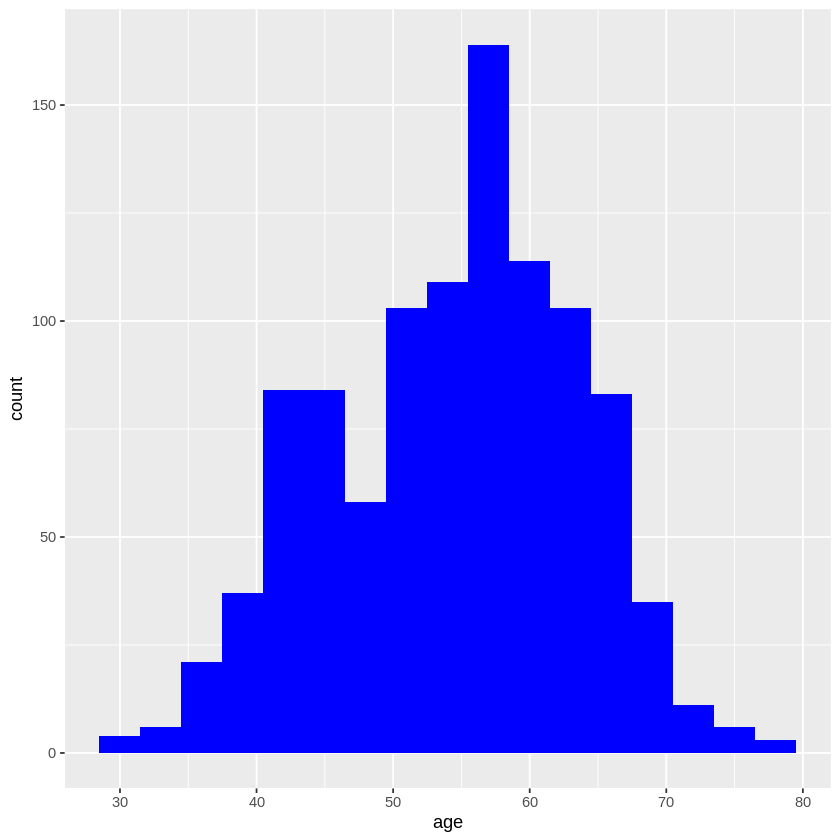

In [ ]:
ggplot(data, aes(age)) + geom_histogram(binwidth=3, fill="blue")


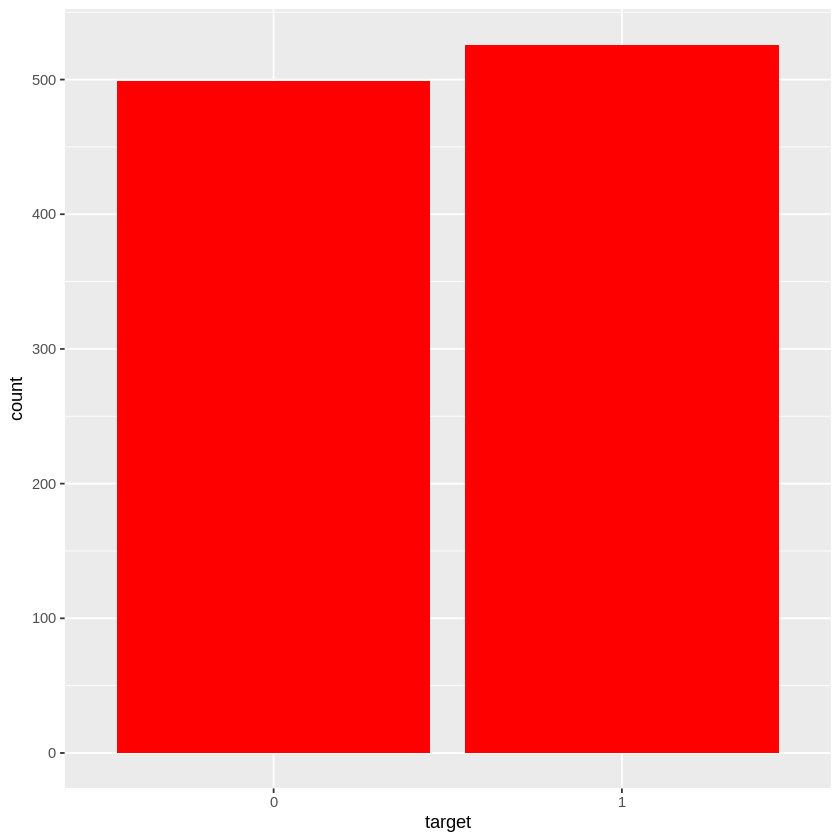

In [ ]:
ggplot(data, aes(target)) + geom_bar(fill="red")


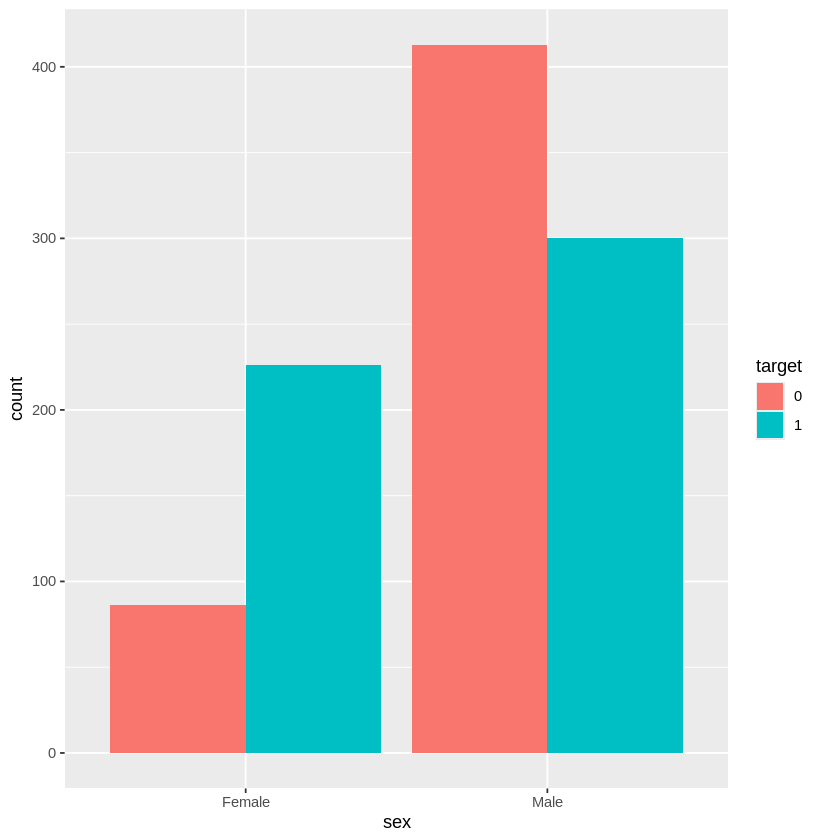

In [ ]:
ggplot(data, aes(sex, fill=target)) + geom_bar(position="dodge")


In [ ]:
df <- read.csv("heart.csv")





In [ ]:
colnames(data)




[1] "age"                           "sex"                          
 [3] "chest_pain_type"               "resting_blood_pressure"       
 [5] "cholestoral"                   "fasting_blood_sugar"          
 [7] "rest_ecg"                      "Max_heart_rate"               
 [9] "exercise_induced_angina"       "oldpeak"                      
[11] "slope"                         "vessels_colored_by_flourosopy"
[13] "thalassemia"                   "target"

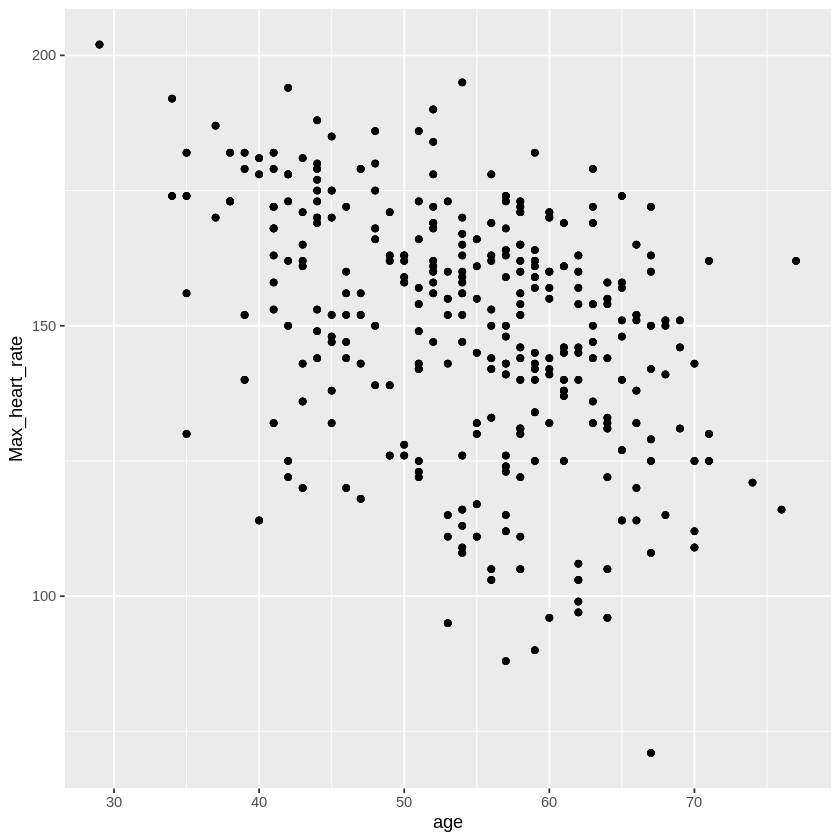

In [ ]:
ggplot(data, aes(x = age, y =Max_heart_rate)) +
  geom_point()


In [ ]:
ggplot(data, aes(x = chest_pain_type, fill = target)) +
  geom_box() +
  labs(title = "Chest Pain Type vs Heart Disease")



ERROR: [1m[33mError[39m in `ggplot()`:[22m
[1m[22m[33m![39m `data` cannot be a function.
[36mℹ[39m Have you misspelled the `data` argument in `ggplot()`?


In [ ]:
numeric_data <- data %>% select(
  age, sex, chest_pain_type, resting_blood_pressure,
  cholestoral, fasting_blood_sugar, rest_ecg,
  Max_heart_rate, exercise_induced_angina, oldpeak,
  slope, vessels_colored_by_flourosopy, thalassemia
)

corrplot(cor(numeric_data), method = "color")



ERROR: Error in corrplot(cor(numeric_data), method = "color"): could not find function "corrplot"


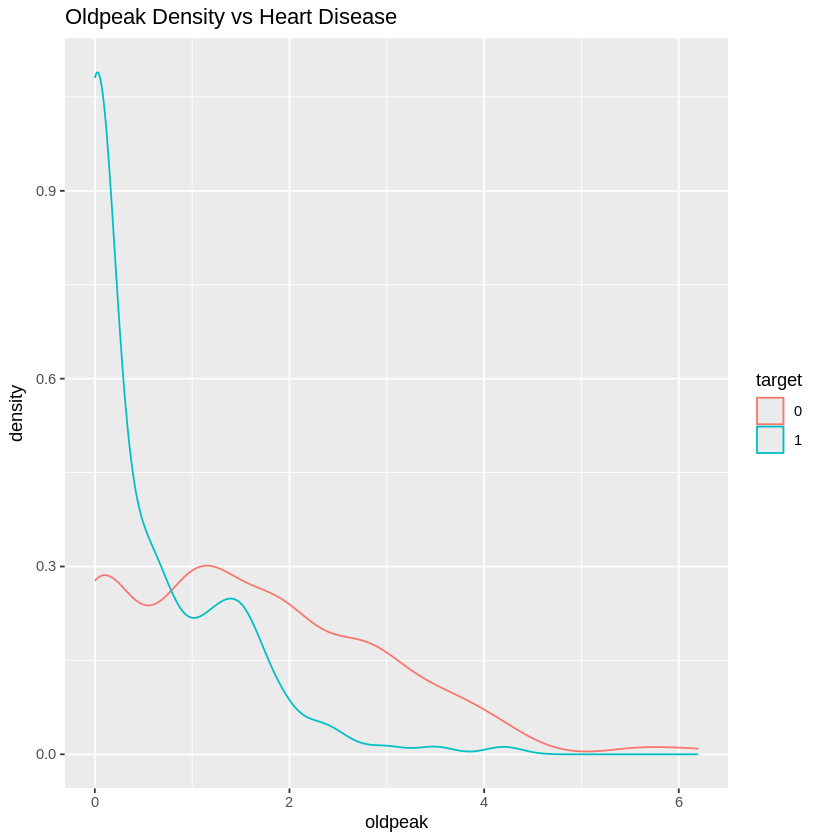

In [ ]:
ggplot(data, aes(x = oldpeak, color = target)) +
  geom_density() +
  labs(title = "Oldpeak Density vs Heart Disease")


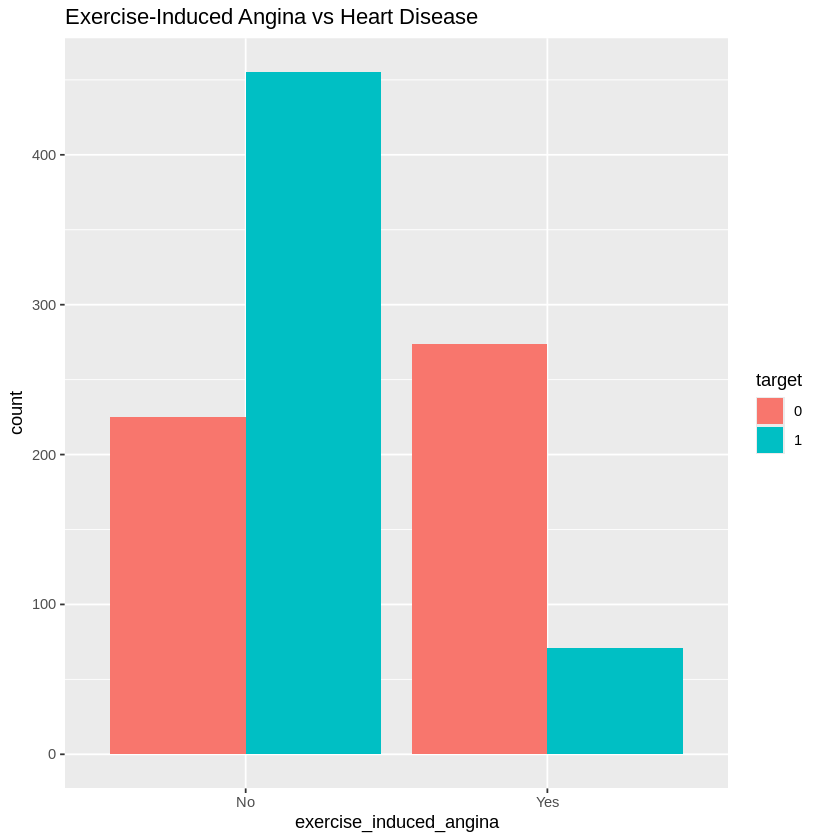

In [ ]:
ggplot(data, aes(x = exercise_induced_angina, fill = target)) +
  geom_bar(position = "dodge") +
  labs(title = "Exercise-Induced Angina vs Heart Disease")



In [ ]:
library(ggplot2)

In [ ]:
install.packages("MLmetrics")
library(MLmetrics)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gtools’, ‘gplots’, ‘ROCR’



Attaching package: ‘MLmetrics’


The following object is masked from ‘package:base’:

    Recall




In [ ]:
set.seed(123)

# 80-20 split
sample_index <- sample(1:nrow(data), 0.8 * nrow(data))

train <- data[sample_index, ]
test  <- data[-sample_index, ]



In [ ]:
model <- glm(target ~ ., data = train, family = binomial)
summary(model)



Call:
glm(formula = target ~ ., family = binomial, data = train)

Coefficients:
                                         Estimate Std. Error z value Pr(>|z|)
(Intercept)                              6.457443   2.607167   2.477 0.013256
age                                      0.023375   0.015239   1.534 0.125063
sexMale                                 -2.047032   0.346766  -5.903 3.57e-09
chest_pain_typeAtypical angina          -1.564973   0.475541  -3.291 0.000999
chest_pain_typeNon-anginal pain         -0.430435   0.413695  -1.040 0.298125
chest_pain_typeTypical angina           -2.305391   0.420438  -5.483 4.17e-08
resting_blood_pressure                  -0.025149   0.007046  -3.569 0.000358
cholestoral                             -0.004711   0.002482  -1.899 0.057624
fasting_blood_sugarLower than 120 mg/ml -0.399291   0.342719  -1.165 0.243990
rest_ecgNormal                           0.771973   1.698841   0.454 0.649533
rest_ecgST-T wave abnormality            1.057144   1.701799 

In [ ]:
pred_prob <- predict(model, test, type = "response")
pred_class <- ifelse(pred_prob > 0.5, 1, 0)

actual <- test$target


In [ ]:
install.packages("MLmetrics")
library(MLmetrics)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
conf_matrix <- table(Predicted = pred_class, Actual = actual)
conf_matrix


         Actual
Predicted   0   1
        0  87   5
        1   8 105

In [ ]:
accuracy <- Accuracy(y_pred = pred_class, y_true = actual)
accuracy


[1] 0.9365854

In [ ]:
precision <- Precision(y_pred = pred_class, y_true = actual, positive = "1")
precision


[1] 0.9292035

In [ ]:
precision <- Precision(y_pred = pred_class, y_true = actual, positive = "1")
precision



[1] 0.9545455

In [ ]:
f1 <- F1_Score(y_pred = pred_class, y_true = actual, positive = "1")
f1


[1] 0.941704

In [ ]:
cat("Accuracy :", accuracy, "\n")
cat("Precision:", precision, "\n")
cat("Recall   :", recall, "\n")
cat("F1 Score :", f1, "\n")


Accuracy : 0.9365854 
Precision: 0.9292035 
Recall   : 0.9545455 
F1 Score : 0.941704 
